# Make sure you are running this notebook in the folder where all the output from T-D pixelmaps is in

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmocean 
import cmocean.cm as cmo
from functools import reduce

In [2]:
fr = []

x = 175
y = 230

NameError: name 'M' is not defined

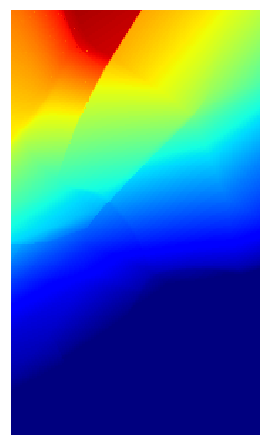

In [3]:
def create_map_rho(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    #file = route of pixel map file from TD
    
    data = pd.read_csv(file, delim_whitespace=True, header=None)
    data.columns = ['pix','value']
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.value[0]
            
            if ref_list[i,0] == loc:
                ref_list[i,1] = value
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_map = np.flip(map_matrix, 0)
    
    return final_map


data = create_map_rho(x,y, "rho_solids")

fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_KN = ax.imshow(data, interpolation ='none', cmap='jet', vmin=3.0, vmax= 3.5) 
ax.axis('off')
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('density.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))


L = M  #Error para parar el programa aquí

In [ ]:
#Names of files with the compositional parameters of the melt. (Depending on the compilation of TD this names may vary)

try:
    abL = pd.read_csv("x_abL1_[h2oL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[h2oL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[h2oL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[h2oL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[h2oL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[h2oL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[h2oL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[h2oL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[h2oL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']

    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_h2oL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_h2oL1)

except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
fr

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[abL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[abL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[abL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[abL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[abL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[abL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[abL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[abL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[abL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_abL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_abL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[anL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[anL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[anL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[anL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[anL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[anL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[anL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[anL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[anL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_anL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_anL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[foL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[foL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[foL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[foL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[foL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[foL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[foL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[foL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[foL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_foL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_foL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[faL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[faL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[faL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[faL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[faL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[faL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[faL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[faL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[faL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_faL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_faL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[kspL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[kspL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[kspL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[kspL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[kspL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[kspL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[kspL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[kspL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[kspL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_kspL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_kspL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[qL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[qL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[qL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[qL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[qL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[qL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[qL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[qL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[qL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_qL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_qL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[silL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[silL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[silL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[silL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[silL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[silL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[silL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[silL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[silL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_silL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_silL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
try:
    abL = pd.read_csv("x_abL1_[woL1]", delim_whitespace=True, header=None)
    abL.columns = ['pix','x_abL']

    anL = pd.read_csv("x_anL1_[woL1]", delim_whitespace=True, header=None)
    anL.columns = ['pix','x_anL']

    faL = pd.read_csv("x_faL1_[woL1]", delim_whitespace=True, header=None)
    faL.columns = ['pix','x_faL']

    foL = pd.read_csv("x_foL1_[woL1]", delim_whitespace=True, header=None)
    foL.columns = ['pix','x_foL']

    h2oL = pd.read_csv("x_h2oL1_[woL1]", delim_whitespace=True, header=None)
    h2oL.columns = ['pix','x_h2oL']

    kspL = pd.read_csv("x_kspL1_[woL1]", delim_whitespace=True, header=None)
    kspL.columns = ['pix','x_kspL']

    qL = pd.read_csv("x_qL1_[woL1]", delim_whitespace=True, header=None)
    qL.columns = ['pix','x_qL']

    silL = pd.read_csv("x_silL1_[woL1]", delim_whitespace=True, header=None)
    silL.columns = ['pix','x_silL']

    woL = pd.read_csv("x_woL1_[woL1]", delim_whitespace=True, header=None)
    woL.columns = ['pix','x_woL']


    frames = [abL, anL, faL, foL, h2oL, kspL, qL, silL, woL]

    #Merging all compositional parameters in one single table.

    Melt_woL1 = reduce(lambda left,right: pd.merge(left,right,on='pix'), frames)
    
    fr.append(Melt_woL1)
    
except FileNotFoundError:
    #do nothing if the file is not found
    pass

In [ ]:
Melt = pd.concat(fr)

In [ ]:
Melt

In [ ]:
#Calculating atoms per formula unit a.p.f.u

Melt['Si'] = Melt.x_abL*3 + Melt.x_anL*2 + Melt.x_faL*2 + Melt.x_foL*2 + Melt.x_kspL*3 + Melt.x_qL*4 + Melt.x_silL*1 + Melt.x_woL*1
Melt['Al'] = Melt.x_abL*1 + Melt.x_anL*2                               + Melt.x_kspL*1               + Melt.x_silL*2 
Melt['Na'] = Melt.x_abL*1 
Melt['Ca'] =                Melt.x_anL*1                                                                             + Melt.x_woL*1
Melt['K']  =                                                             Melt.x_kspL*1 
Melt['Fe'] =                               Melt.x_faL*4
Melt['Mg'] =                                              Melt.x_foL*4 
Melt['H']  =                                                                                                                          Melt.x_h2oL*2
Melt['O']  = Melt.x_abL*8 + Melt.x_anL*8 + Melt.x_faL*8 + Melt.x_foL*8 + Melt.x_kspL*8 + Melt.x_qL*8 + Melt.x_silL*5 + Melt.x_woL*3 + Melt.x_h2oL*1


SiO2_mol  = (Melt['Si'])
Al2O3_mol = (Melt['Al']/2)
CaO_mol   = (Melt['Ca'])
MgO_mol   = (Melt['Mg'])
FeO_mol   = (Melt['Fe'])
K2O_mol   = (Melt['K']/2)
Na2O_mol  = (Melt['Na']/2)
H2O_mol   = (Melt['H']/2)

Sum_oxides_mol = SiO2_mol + Al2O3_mol + CaO_mol + MgO_mol + FeO_mol + K2O_mol + Na2O_mol + H2O_mol

Melt['SiO2_mol']  = SiO2_mol*100/Sum_oxides_mol
Melt['Al2O3_mol'] = Al2O3_mol*100/Sum_oxides_mol
Melt['CaO_mol']   = CaO_mol*100/Sum_oxides_mol
Melt['MgO_mol']   = MgO_mol*100/Sum_oxides_mol
Melt['FeO_mol']   = FeO_mol*100/Sum_oxides_mol
Melt['K2O_mol']   = K2O_mol*100/Sum_oxides_mol
Melt['Na2O_mol']  = Na2O_mol*100/Sum_oxides_mol
Melt['H2O_mol']   = H2O_mol*100/Sum_oxides_mol


#Calculating wt% of each oxide

SiO2_wt  = (Melt['Si'])*60.08
Al2O3_wt = (Melt['Al']/2)*101.96
CaO_wt   = (Melt['Ca'])*56.08
MgO_wt   = (Melt['Mg'])*40.31
FeO_wt   = (Melt['Fe'])*71.85
K2O_wt   = (Melt['K']/2)*94.20
Na2O_wt  = (Melt['Na']/2)*61.98
H2O_wt   = (Melt['H']/2)*18.02

Sum_oxides  = SiO2_wt + Al2O3_wt + CaO_wt + MgO_wt + FeO_wt + K2O_wt + Na2O_wt + H2O_wt 

SiO2_wt_h  = SiO2_wt*100/Sum_oxides
Al2O3_wt_h = Al2O3_wt*100/Sum_oxides
CaO_wt_h   = CaO_wt*100/Sum_oxides
MgO_wt_h   = MgO_wt*100/Sum_oxides
FeO_wt_h   = FeO_wt*100/Sum_oxides
K2O_wt_h   = K2O_wt*100/Sum_oxides
Na2O_wt_h  = Na2O_wt*100/Sum_oxides
H2O_wt_h   = H2O_wt*100/Sum_oxides

Sum_oxides_anhy  = SiO2_wt_h + Al2O3_wt_h + CaO_wt_h + MgO_wt_h + FeO_wt_h + K2O_wt_h + Na2O_wt_h # no H2O 

Melt['SiO2_wt%']  = SiO2_wt_h*100/Sum_oxides_anhy
Melt['Al2O3_wt%'] = Al2O3_wt_h*100/Sum_oxides_anhy
Melt['CaO_wt%']   = CaO_wt_h*100/Sum_oxides_anhy
Melt['MgO_wt%']   = MgO_wt_h*100/Sum_oxides_anhy
Melt['FeO_wt%']   = FeO_wt_h*100/Sum_oxides_anhy
Melt['K2O_wt%']   = K2O_wt_h*100/Sum_oxides_anhy
Melt['Na2O_wt%']  = Na2O_wt_h*100/Sum_oxides_anhy


#Now we calculate melt parameters

Melt['Fe_number']  = Melt['FeO_wt%']/(Melt['FeO_wt%'] + Melt['MgO_wt%'])
Melt['Mg_number']  = Melt['Mg']/(Melt['Fe'] + Melt['Mg'])
Melt['MALI']       = Melt['K2O_wt%'] + Melt['Na2O_wt%'] - Melt['CaO_wt%']
Melt['ASI']        = Melt['Al2O3_mol']/(Melt['CaO_mol'] + Melt['K2O_mol'] + Melt['Na2O_mol'])
Melt['Alkalinity'] = (Melt['Na'] + Melt['K'])/Melt['Al']
Melt['K2O_Na2O']   = Melt['K2O_wt%']/Melt['Na2O_wt%']

writer = pd.ExcelWriter('Melt.xlsx')
Melt.to_excel(writer,'sheet1')
writer.save()

In [ ]:
# Functions that calculate pixelmaps for additional melt parameters

def create_Fe_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.Fe_number[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_Fe_map = np.flip(map_matrix, 0)
    
    return final_Fe_map


def create_Mg_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.Mg_number[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_Mg_map = np.flip(map_matrix, 0)
    
    return final_Mg_map


def create_MALI_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.MALI[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_MALI_map = np.flip(map_matrix, 0)
    
    return final_MALI_map

def create_ASI_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.ASI[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_ASI_map = np.flip(map_matrix, 0)
    
    return final_ASI_map

def create_Alkalinity_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.Alkalinity[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_Alkalinity_map = np.flip(map_matrix, 0)
    
    return final_Alkalinity_map


def create_ASI_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.ASI[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_ASI_map = np.flip(map_matrix, 0)
    
    return final_ASI_map

def create_KN_map(x, y, file):

    #x = 175 pixels in x
    #y = 230 pixels in y
    
    data = file #pandas dataframe containing all melt variables
    
    ref_list = np.zeros(shape=(x*y,2))

    #Filling reference list
    for i in range(x*y):
    
        #Populating first column
        ref_list[i,0] = i+1
        
        #Filling with data values
        check = data[data.pix == i+1].any() 
        if check[0] == True:
            finder = data.loc[data['pix'] == i+1].reset_index(drop=True)
            loc = finder.pix[0]
            value = finder.K2O_Na2O[0]
            ref_list[i,1] = value
        
        else:
            ref_list[i,1] = np.nan
              
    
    #Filling map matrix
    map_matrix = np.zeros(shape=(y,x))
    n = 0
    for i in range(y):
        for j in range(x):
            map_matrix[i,j] = ref_list[n,1]
            n +=1
    
    final_KN_map = np.flip(map_matrix, 0)
    
    return final_KN_map

In [ ]:
Fe = create_Fe_map(x, y, Melt)
Mg = create_Mg_map(x, y, Melt)
MALI = create_MALI_map(x, y, Melt)
ASI = create_ASI_map(x, y, Melt)
Alkalinity = create_Alkalinity_map(x, y, Melt)
KN = create_KN_map(x, y, Melt)

In [ ]:
fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_Fe = ax.imshow(Fe, interpolation ='none', cmap='jet', vmin=0.60, vmax= 0.85) 
ax.axis('off')
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('1_Fe_number.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))

In [ ]:
fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_Mg = ax.imshow(Mg, interpolation ='none', cmap='rainbow', vmin=0.25, vmax= 0.50) 
ax.axis('off')
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('2_Mg_number.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))

In [ ]:
fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_MALI = ax.imshow(MALI, interpolation ='none', cmap='gist_rainbow', vmin=-3, vmax= 10) 
ax.axis('off')
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('3_MALI.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))

In [ ]:
fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_ASI = ax.imshow(ASI, interpolation ='none', cmap='jet', vmin=0.9, vmax= 1.1) 
ax.axis('off')
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('4_ASI.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))

In [ ]:
fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_Alkalinity = ax.imshow(Alkalinity, interpolation ='none', cmap='jet', vmin=0.45, vmax= 0.95) 
ax.axis('off')
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('5_Alkalinity.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))

In [ ]:
fig = plt.figure(figsize=(x*(15/2.54)/300,15/2.54))
ax = fig.add_subplot(111)

im_KN = ax.imshow(KN, interpolation ='none', cmap='jet', vmin=0.0, vmax= 1.0)
#ax.set_xlabel('T (°C)', fontsize=16)
#ax.set_ylabel('P (kbar)', fontsize=16)
#ax.tick_params(direction='out', pad=8)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
ax.set_aspect('auto')

plt.savefig('6_K2O_Na2O.pdf', format='pdf', frameon=False, transparent=True, dpi=300/(15/2.54))

In [ ]:
plt.gca().set_visible(False)
plt.colorbar(im_Fe)
np.nanmin(Fe), np.nanmax(Fe)

In [ ]:
plt.gca().set_visible(False)
plt.colorbar(im_Mg)
np.nanmin(Mg), np.nanmax(Mg)

In [ ]:
plt.gca().set_visible(False)
plt.colorbar(im_MALI)
np.nanmin(MALI), np.nanmax(MALI)

In [ ]:
plt.gca().set_visible(False)
plt.colorbar(im_ASI)
np.nanmin(ASI), np.nanmax(ASI)

In [ ]:
plt.gca().set_visible(False)
plt.colorbar(im_Alkalinity)
np.nanmin(Alkalinity), np.nanmax(Alkalinity)

In [ ]:
plt.gca().set_visible(False)
plt.colorbar(im_KN)
np.nanmin(KN), np.nanmax(KN)